In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm

%matplotlib inline

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60&deg; F or warmer than 100&deg; F.

In [2]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df.head()

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.
4. Extrapolate data:  If the ground temperature reached 95&deg; F, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning?

In [4]:
input_data = df[['Ground Temperature']]
output_data = df[['Chirps/Second']]


In [5]:
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)
print(regr1.coef_, regr1.intercept_)
print(regr1.score(input_data, output_data))

[[ 0.20299973]] [ 0.45931465]
0.692294652915


/Users/David/.direnv/python-3.5.1/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


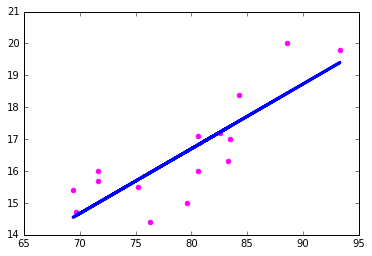

In [6]:
plt.scatter(input_data, output_data, color='magenta')
plt.plot(input_data, regr1.predict(input_data), color='blue', linewidth=3)

In [7]:
regr1.predict(95)

array([[ 19.74428913]])

In [8]:
output_data = df[['Ground Temperature']]
input_data = df[['Chirps/Second']]
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)
print(regr1.coef_, regr1.intercept_)
print(regr1.score(input_data, output_data))
regr1.predict(18)

[[ 3.410323]] [ 22.84898231]
0.692294652915


array([[ 84.2347963]])

## Brain vs. Body Weight

In the file brain_body.txt, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [9]:
df = pd.read_fwf("brain_body.txt")

In [10]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [11]:
input_data = df[['Brain']]
output_data = df['Body']

In [12]:
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)
print(regr1.coef_, regr1.intercept_)
print(regr1.score(input_data, output_data))

[ 0.96649637] 91.0043962074
0.872662084304


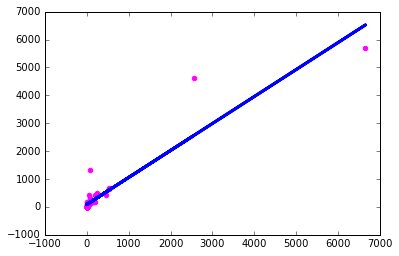

In [13]:
plt.scatter(input_data, output_data, color='magenta')
plt.plot(input_data, regr1.predict(input_data), color='blue', linewidth=3)

## Salary Discrimination

The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:


1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best R2 score.
3. Report whether sex is a factor in salary. Support your argument with graph(s) if appropriate.

In [14]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [15]:
input_data = df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']]
output_data = df['Salary']
feature_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [16]:
regr1 = linear_model.LinearRegression()
regr1.fit(input_data, output_data)
print(regr1.coef_, regr1.intercept_)
print(regr1.score(input_data, output_data))

[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341  -128.79057354] 11410.1465473
0.854718067441


In [17]:
print(list(zip(feature_cols, regr1.coef_)))
regr1.predict([1, 3, 10, 1, 5])

[('Sex', 1241.7924996014231), ('Rank', 5586.1814495214376), ('Year', 482.85976782882136), ('Degree', -1331.6440634059163), ('YSdeg', -128.79057354486233)]


/Users/David/.direnv/python-3.5.1/lib/python3.5/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 32263.48414258])

In [23]:
result = sm.OLS(output_data, input_data)
result = result.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     321.3
Date:                Mon, 25 Apr 2016   Prob (F-statistic):           4.07e-35
Time:                        17:03:36   Log-Likelihood:                -506.76
No. Observations:                  52   AIC:                             1024.
Df Residuals:                      47   BIC:                             1033.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Sex         3871.2440   1555.139      2.489      0.016       742.708  6999.780
Rank        7492.4710   1169.252      6.408      0.000      5140.239  9844.703
Year         575.6705    167.071      3.446      0.001       239.566   911.775
Degree      3115.1349   1645.242      1.893      0.064      -194.665  6424.935
YSdeg          4.9693    136.357      0.036      0.971      -269.346   279.285
==============================================================================
Omnibus:                        0.113   Durbin-Watson:                   1.494
Prob(Omnibus):                  0.945   Jarque-Bera (JB):                0.107
Skew:                           0.088   Prob(JB):                        0.948
Kurtosis:                       2.864   Cond. No.                         74.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""